##Data Loading

In [ ]:
# Access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/grants.csv'
grants_df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
grants_df.head()

First few rows of the dataset:


,Unnamed: 0,opportunity_id,opportunity_title,opportunity_number,opportunity_category,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,...,post_date,close_date,last_updated_date,archive_date,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,additional_information_url
0,0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,Discretionary,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,...,2014-08-15,2014-09-04,2014-08-20,2014-10-04,600000.0,400000.0,600000.0,1.0,False,NaN
1,1,262308,Health and resiliency of salt marshes in Jamai...,NPS-14-NERO-0119,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-18,2014-08-23,2014-08-18,2014-08-24,275897.0,275897.0,275897.0,1.0,False,NaN
2,2,262368,Post-Hurricane Sandy submerged marine habitat ...,NPS-14-NERO-0125,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,480000.0,480000.0,480000.0,1.0,False,NaN
3,3,262390,Inventory and Monitoring of Amphibians and Rep...,NPS-14-NERO-0087,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,255577.0,255577.0,255577.0,1.0,False,NaN
4,4,131594,Youth Leadership Program with Algeria,ECA-PE-C-PY-12-09,Discretionary,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,...,2011-11-21,2012-01-04,2011-11-21,2012-01-05,250000.0,NaN,250000.0,1.0,True,http://exchanges.state.gov/grants/open2.html


##Initial Data Exploration

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
grants_df.info()

# Check for missing values and summary statistics
print("\nSummary Statistics:")
grants_df.describe()

print("\nMissing Values Count:")
print(grants_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75640 entries, 0 to 75639
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            75640 non-null  int64  
 1   opportunity_id                        75640 non-null  int64  
 2   opportunity_title                     75640 non-null  object 
 3   opportunity_number                    75640 non-null  object 
 4   opportunity_category                  75640 non-null  object 
 5   funding_instrument_type               75640 non-null  object 
 6   category_of_funding_activity          75640 non-null  object 
 7   cfda_numbers                          74815 non-null  float64
 8   eligible_applicants                   75640 non-null  object 
 9   eligible_applicants_type              75640 non-null  object 
 10  agency_code                           75597 non-null  object 

##Data Cleaning

In [ ]:
# Drop irrelevant columns
grants_df = grants_df.drop(columns=['Unnamed: 0', 'additional_information_url'])
print("Dropped irrelevant columns.")

Dropped irrelevant columns.


In [ ]:
# Fill categorical columns with "Unknown"
grants_df['agency_code'] = grants_df['agency_code'].fillna("Unknown")
grants_df['agency_name'] = grants_df['agency_name'].fillna("Unknown")
grants_df['cfda_numbers'] = grants_df['cfda_numbers'].fillna("Unknown")

# Fill numeric columns with median values
grants_df['award_ceiling'] = grants_df['award_ceiling'].fillna(grants_df['award_ceiling'].median())
grants_df['award_floor'] = grants_df['award_floor'].fillna(grants_df['award_floor'].median())
grants_df['estimated_total_program_funding'] = grants_df['estimated_total_program_funding'].fillna(grants_df['estimated_total_program_funding'].median())
grants_df['expected_number_of_awards'] = grants_df['expected_number_of_awards'].fillna(grants_df['expected_number_of_awards'].median())

print("Missing values handled without inplace warnings.")

Missing values handled without inplace warnings.


##Basic Exploratory Data Analysis

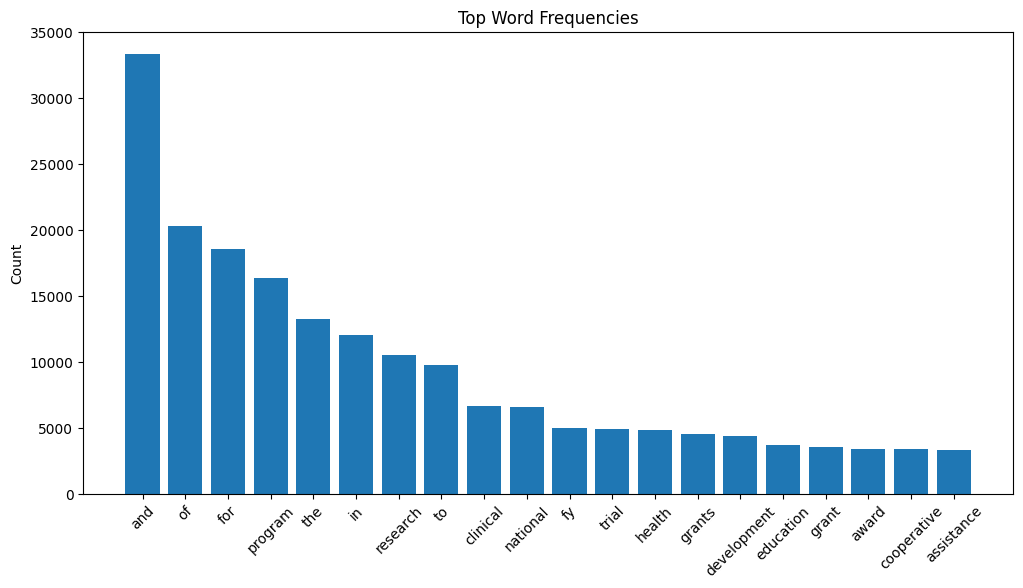

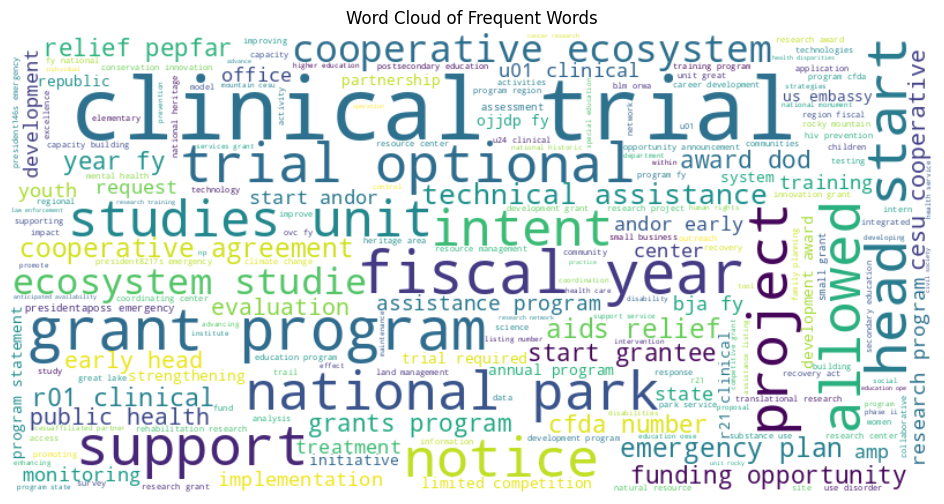

In [ ]:
# Import libraries for word frequency analysis
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define function for word frequency analysis
def plot_word_frequency(corpus, top_n=20):
    """
    Generate and display a bar chart for the most common words in the corpus.
    Also display a word cloud.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    top_n (int): Number of top words to visualize.
    """
    # Flatten corpus into single list of words
    all_words = ' '.join(corpus).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(top_n)

    # Bar chart for most common words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Word Frequencies')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Frequent Words')
    plt.show()

# Preprocess opportunity_title column and analyze
cleaned_text = grants_df['opportunity_title'].dropna().str.lower().str.replace('[^\w\s]', '', regex=True).str.split()
cleaned_text = [' '.join(doc) for doc in cleaned_text]
plot_word_frequency(cleaned_text, top_n=20)

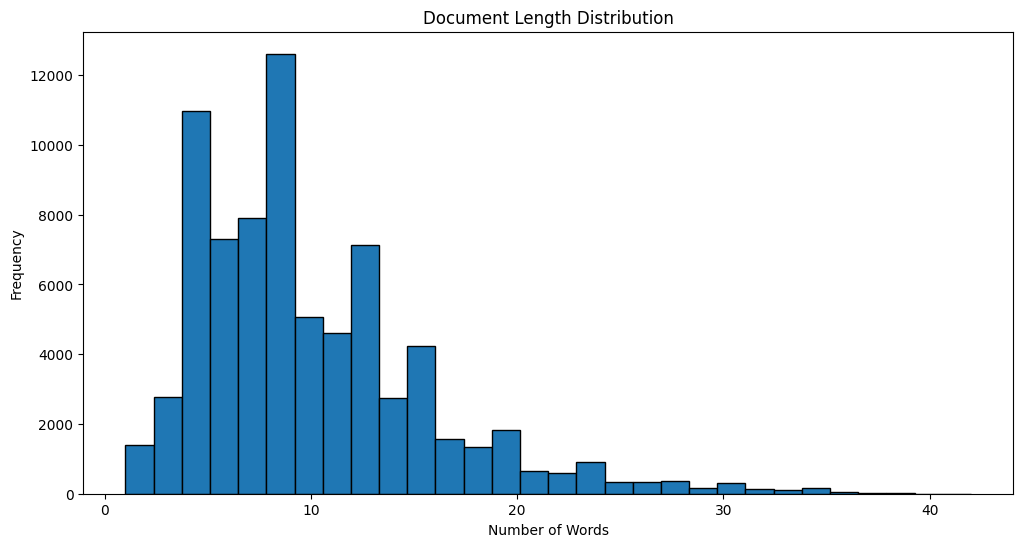

In [ ]:
# Import libraries for document length distribution
import matplotlib.pyplot as plt

# Define function to plot document length distribution
def plot_document_length_distribution(corpus):
    """
    Plot the distribution of document lengths in terms of the number of words.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    """
    # Calculate document lengths
    document_lengths = [len(doc.split()) for doc in corpus]

    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.hist(document_lengths, bins=30, edgecolor='black')
    plt.title('Document Length Distribution')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

plot_document_length_distribution(cleaned_text)


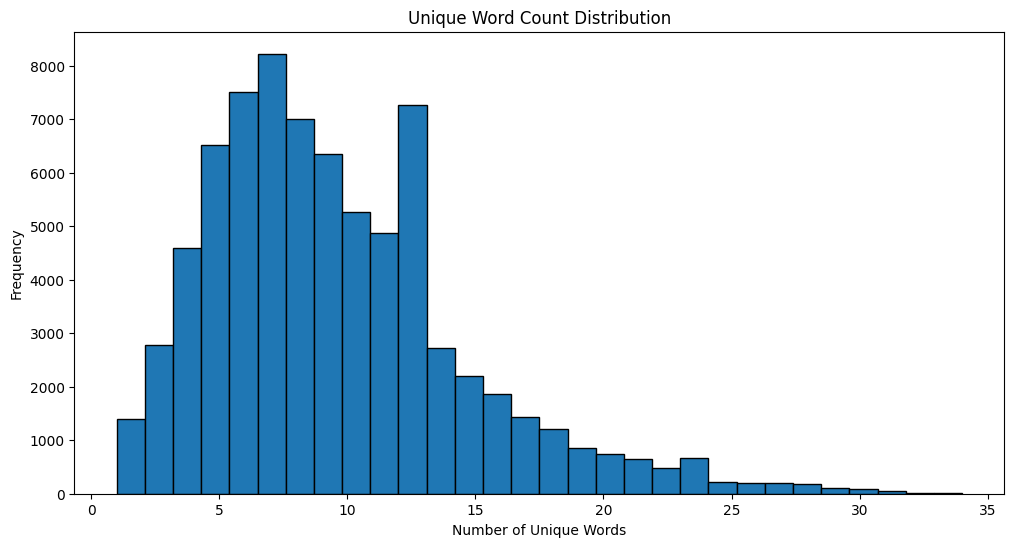

In [ ]:
# Define function to plot unique word count distribution
def plot_unique_word_count_distribution(corpus):
    """
    Plot the distribution of unique word counts per document.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    """
    # Calculate unique word counts
    unique_word_counts = [len(set(doc.split())) for doc in corpus]

    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.hist(unique_word_counts, bins=30, edgecolor='black')
    plt.title('Unique Word Count Distribution')
    plt.xlabel('Number of Unique Words')
    plt.ylabel('Frequency')
    plt.show()

plot_unique_word_count_distribution(cleaned_text)

In [ ]:
# Convert date columns to datetime format
date_columns = ['post_date', 'close_date', 'last_updated_date', 'archive_date']
for col in date_columns:
    grants_df[col] = pd.to_datetime(grants_df[col], errors='coerce')

# Drop rows where essential date fields are missing
grants_df = grants_df.dropna(subset=['close_date', 'archive_date'])
print("Date columns converted and essential missing dates handled.")

Date columns converted and essential missing dates handled.


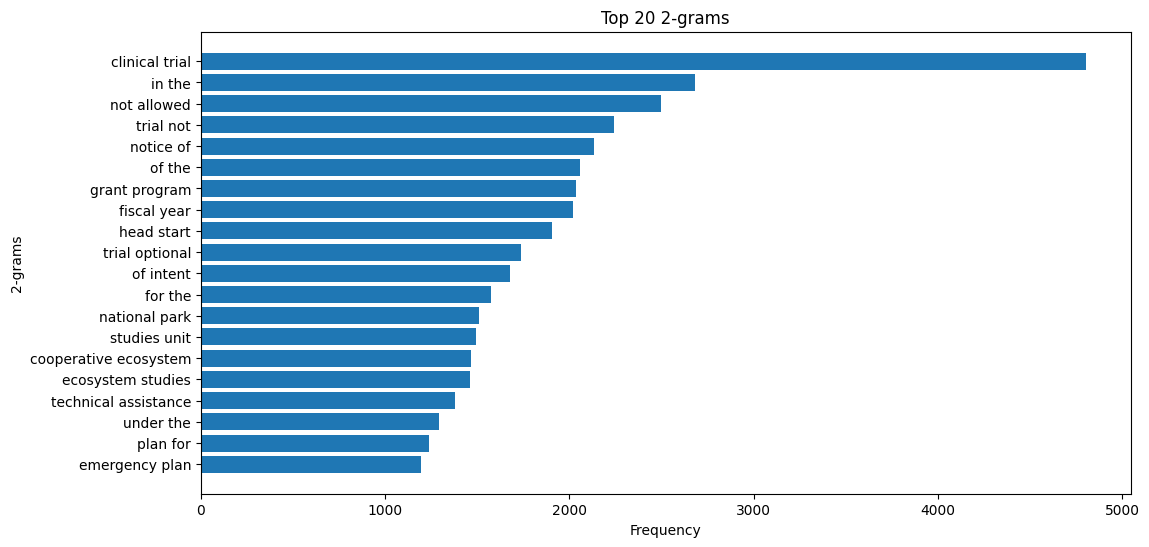

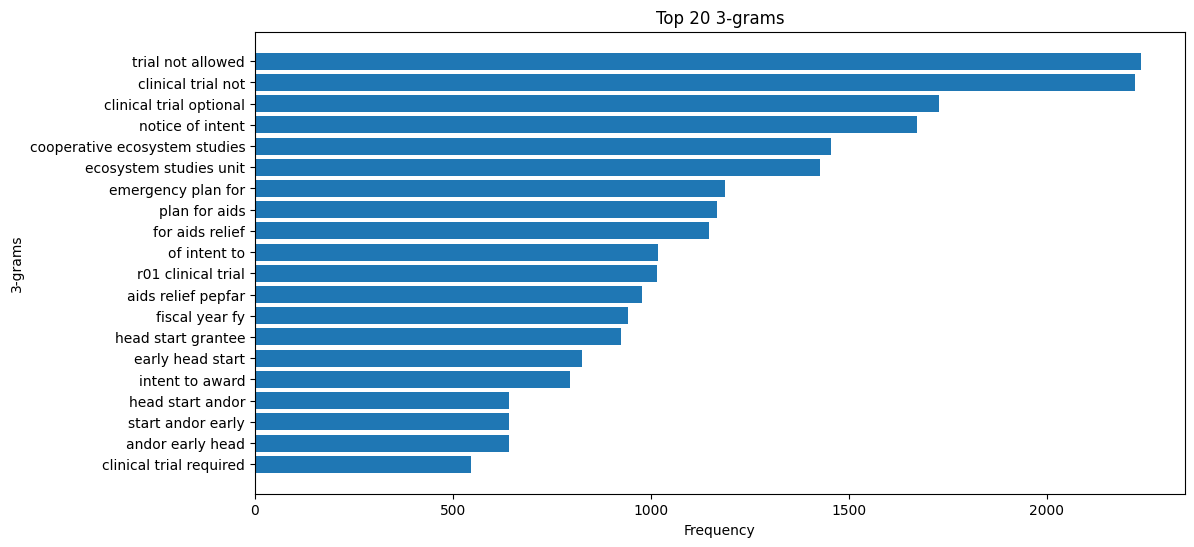

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define function to plot top N n-grams
def plot_top_ngrams(corpus, n=2, top_n=20):
    """
    Plot the most common n-grams in the corpus.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    n (int): N-gram size (e.g., 2 for bigrams, 3 for trigrams).
    top_n (int): Number of top n-grams to display.
    """
    # Create n-gram vectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_matrix = vectorizer.fit_transform(corpus)

    # Sum up n-gram occurrences
    ngram_counts = ngram_matrix.sum(axis=0)
    ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_n]

    # Convert to DataFrame for visualization
    ngram_df = pd.DataFrame(ngram_freq, columns=['N-gram', 'Frequency'])

    # Plot top n-grams
    plt.figure(figsize=(12, 6))
    plt.barh(ngram_df['N-gram'], ngram_df['Frequency'])
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_ngrams(cleaned_text, n=2, top_n=20)
plot_top_ngrams(cleaned_text, n=3, top_n=20)

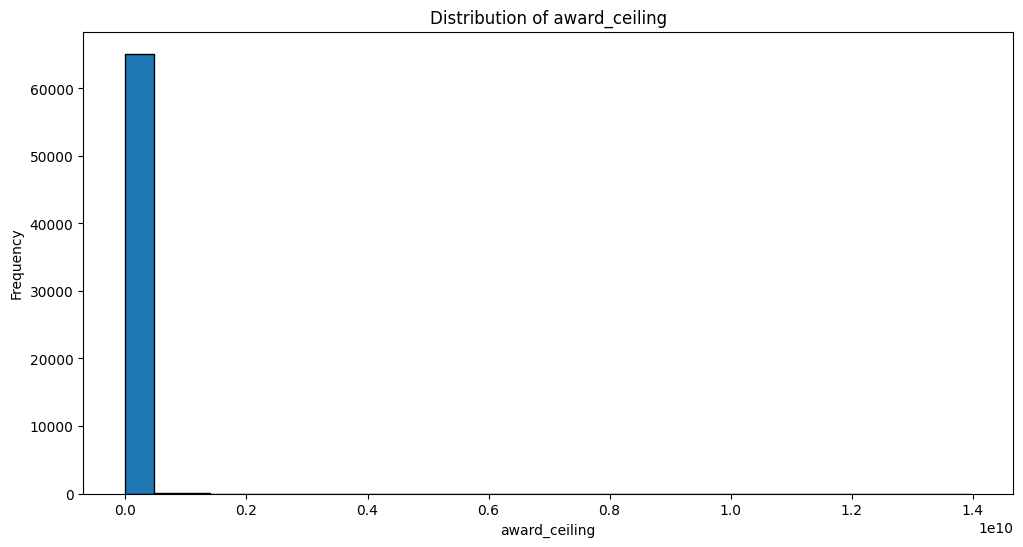

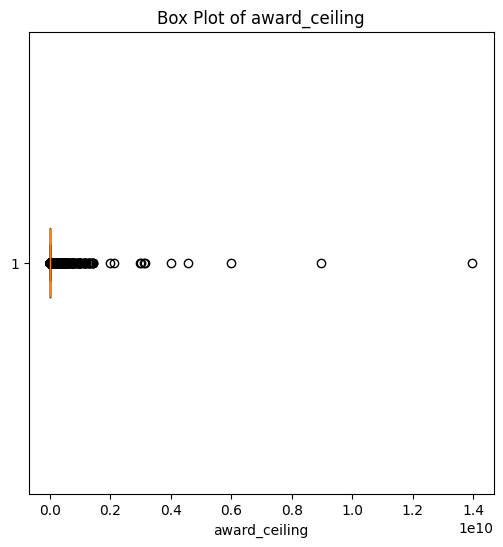

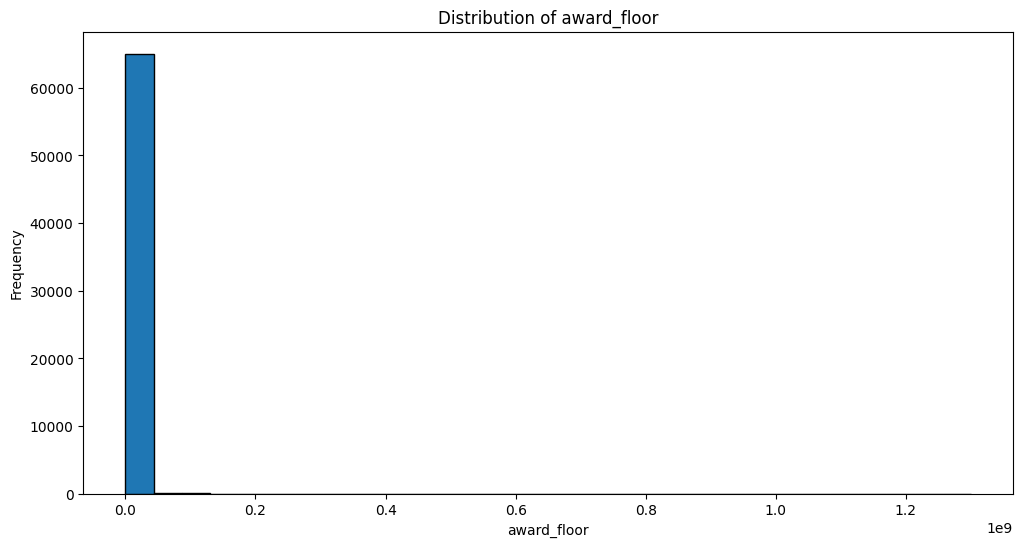

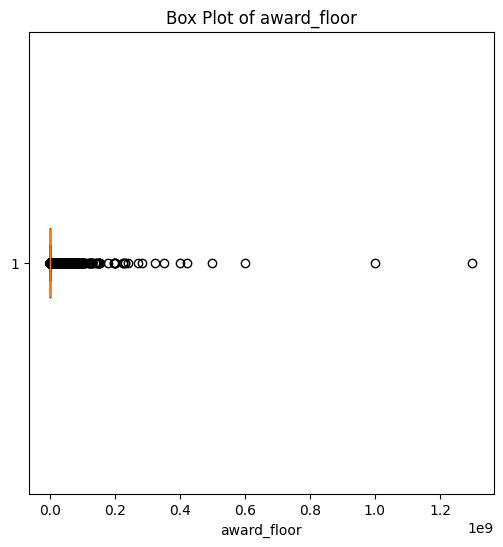

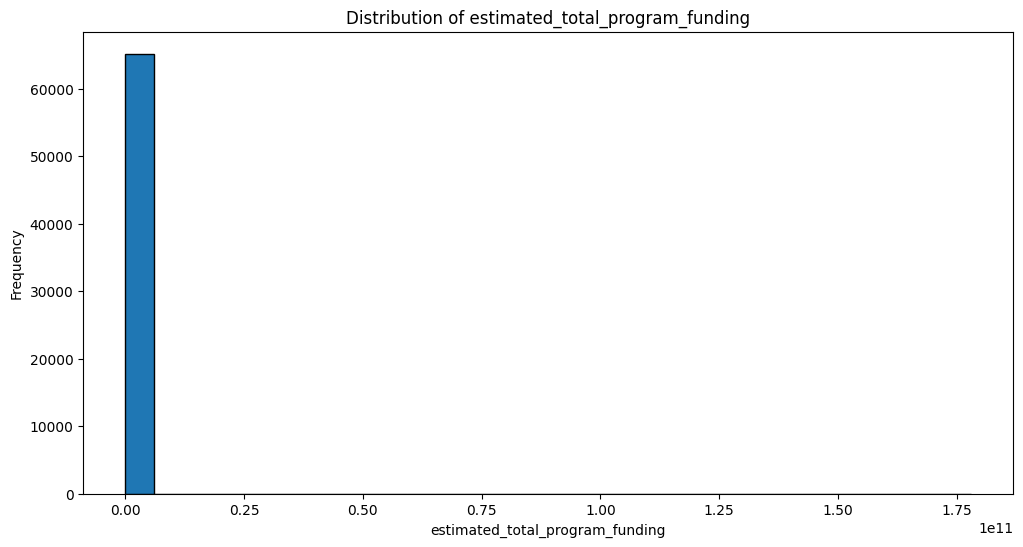

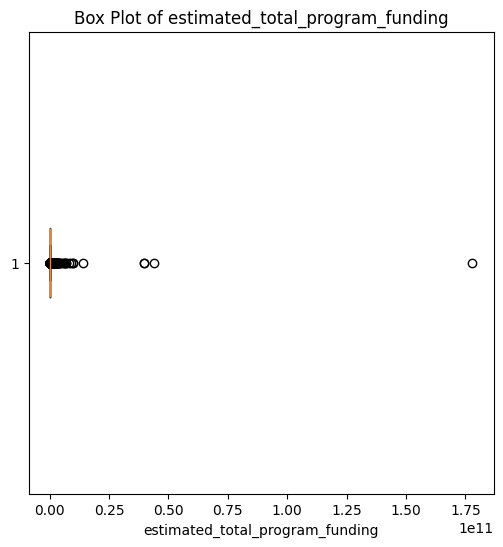

In [ ]:
# Define function to analyze numeric variable distributions
def plot_numeric_distributions(df, columns):
    """
    Plot histograms and box plots for numeric variables.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numeric columns.
    columns (list of str): List of column names to analyze.
    """
    for column in columns:
        if column in df.columns:
            # Histogram
            plt.figure(figsize=(12, 6))
            plt.hist(df[column].dropna(), bins=30, edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

            # Box plot
            plt.figure(figsize=(6, 6))
            plt.boxplot(df[column].dropna(), vert=False)
            plt.title(f'Box Plot of {column}')
            plt.xlabel(column)
            plt.show()

numeric_columns = ['award_ceiling', 'award_floor', 'estimated_total_program_funding']
plot_numeric_distributions(grants_df, numeric_columns)

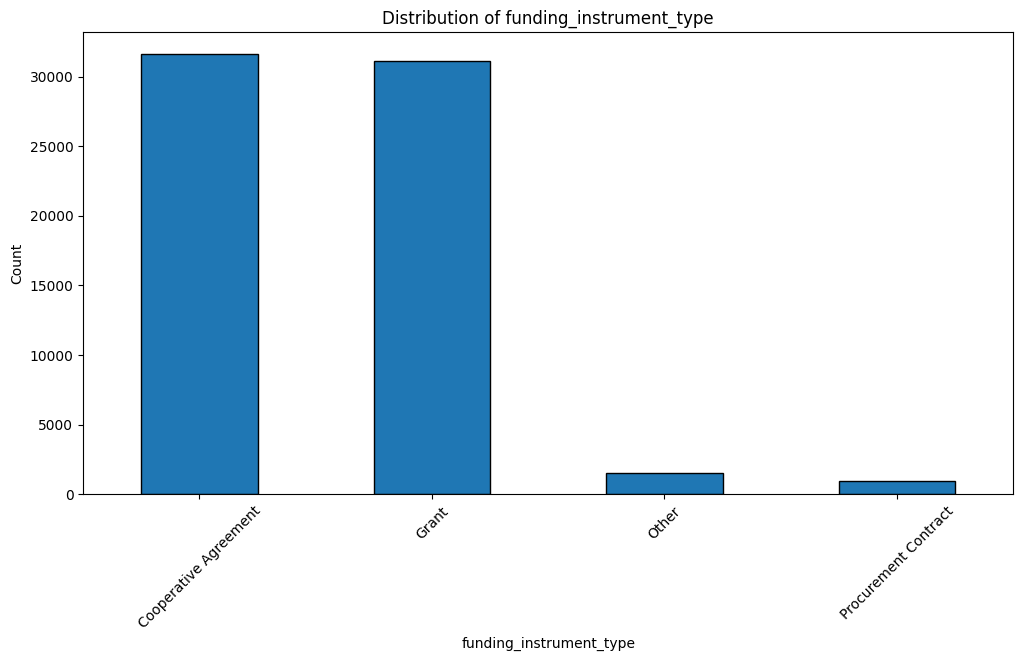

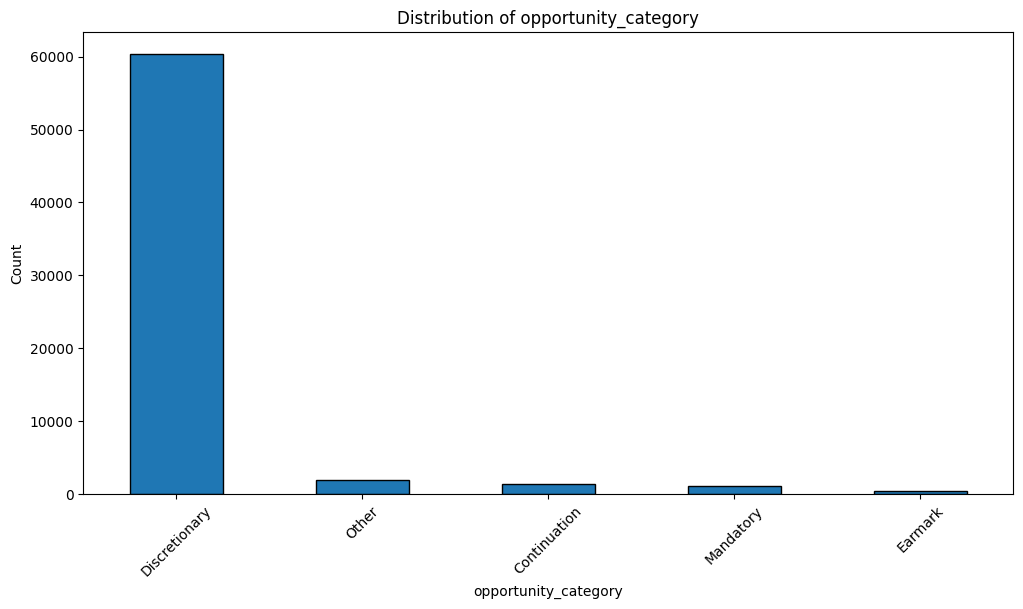

In [ ]:
# Define function to analyze categorical variable distributions
def plot_categorical_distributions(df, columns):
    """
    Plot bar charts for categorical variables.

    Parameters:
    df (pd.DataFrame): The DataFrame containing categorical columns.
    columns (list of str): List of column names to analyze.
    """
    for column in columns:
        if column in df.columns:
            # Frequency distribution
            plt.figure(figsize=(12, 6))
            df[column].value_counts().plot(kind='bar', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

categorical_columns = ['funding_instrument_type', 'opportunity_category']
plot_categorical_distributions(grants_df, categorical_columns)

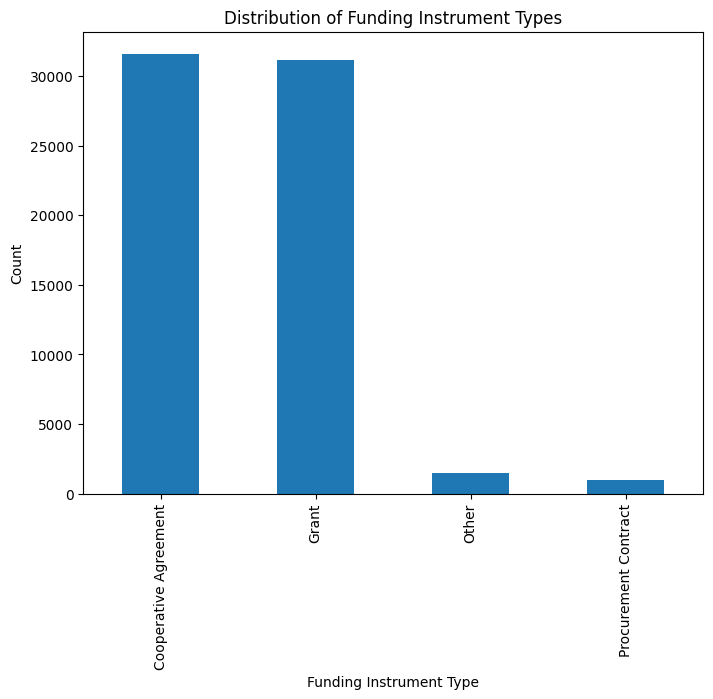

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of funding instrument types
plt.figure(figsize=(8,6))
grants_df['funding_instrument_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Funding Instrument Types')
plt.xlabel('Funding Instrument Type')
plt.ylabel('Count')
plt.show()

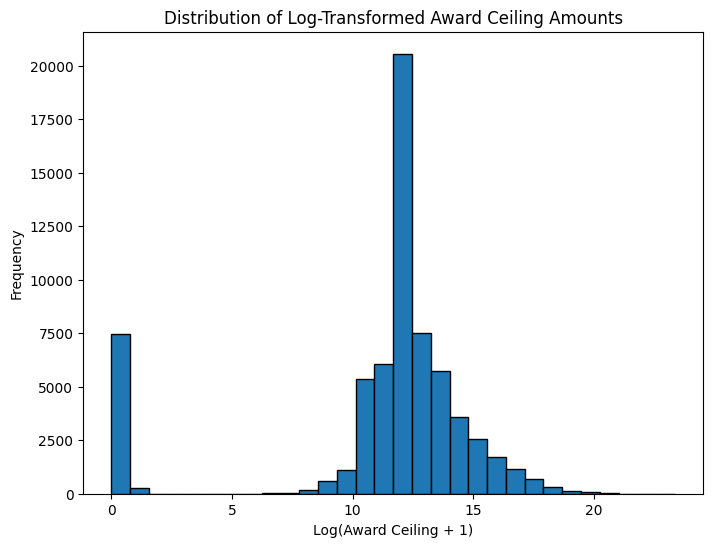

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding 1 to avoid log(0))
plt.figure(figsize=(8,6))
np.log1p(grants_df['award_ceiling']).dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Log-Transformed Award Ceiling Amounts')
plt.xlabel('Log(Award Ceiling + 1)')
plt.ylabel('Frequency')
plt.show()

##Save the Cleaned Data

In [ ]:
# Save the cleaned data to Google Drive
output_path_drive = '/content/drive/MyDrive/cleaned_grants.csv'
grants_df.to_csv(output_path_drive, index=False)
print(f"Cleaned dataset saved to Google Drive at {output_path_drive}")

Cleaned dataset saved to Google Drive at /content/drive/MyDrive/cleaned_grants.csv


##Data Preprocessing

In [ ]:
pip install bertopic umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Select relevant columns for topic modeling
text_data = grants_df['opportunity_title'].dropna().tolist()

# Ensure proper preprocessing
preprocessed_text = [
    ' '.join(doc.lower().split()) for doc in text_data
]


##Train BERTopic Model

In [ ]:
from bertopic import BERTopic

# Create and train BERTopic model
topic_model = BERTopic(language="english", verbose=True)
topics, probs = topic_model.fit_transform(preprocessed_text)

# Save the model for future use
topic_model.save("bertopic_model")


2024-11-27 02:53:38,801 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2039 [00:00<?, ?it/s]

2024-11-27 02:54:06,425 - BERTopic - Embedding - Completed ✓
2024-11-27 02:54:06,427 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-27 02:54:57,543 - BERTopic - Dimensionality - Completed ✓
2024-11-27 02:54:57,546 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-27 02:55:03,536 - BERTopic - Cluster - Completed ✓
2024-11-27 02:55:03,562 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-27 02:55:05,988 - BERTopic - Representation - Completed ✓
2024-11-27 02:55:10,180 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


##Exploring Topics

In [ ]:
# View topic representation
print(topic_model.get_topic_info())

# Visualize topic frequencies
topic_model.visualize_barchart(top_n_topics=10).show()

# Visualize topic clusters
topic_model.visualize_topics().show()

# Save topics to the dataframe
grants_df['topic'] = topics


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Display top terms for each topic
for topic_id in range(len(topic_model.get_topics())):
    print(f"Topic {topic_id}:")
    print(topic_model.get_topic(topic_id), "\n")


Streaming output truncated to the last 5000 lines.
[('salmon', 0.11275384272907564), ('salmonid', 0.05354403778847563), ('chinook', 0.053230853184208414), ('yukon', 0.04651583282024282), ('escapement', 0.023867395403608726), ('spawning', 0.02326908391090169), ('sacramento', 0.018527782313162988), ('river', 0.017669153493753188), ('coho', 0.017048139574006232), ('steelhead', 0.016646192344905757)] 

Topic 34:
[('tobacco', 0.09355590621980882), ('smoking', 0.049745467553126616), ('cessation', 0.046313821144194904), ('regulatory', 0.02365359069962703), ('quitline', 0.015973617820377574), ('socioeconomically', 0.014531063436503353), ('relevant', 0.013128942860058225), ('tobaccorelated', 0.01157712631179801), ('promoted', 0.010898297577377515), ('uc2', 0.010861913167691748)] 

Topic 35:
[('welfare', 0.06831601238183438), ('child', 0.039736541049368745), ('marriage', 0.02094355718384573), ('ccdbg', 0.019052174745051224), ('adoptuskids', 0.015179166652305402), ('recruitment', 0.01421811000006

##Check Topic Coherence

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Prepare the corpus for coherence calculation
docs = [doc.split() for doc in preprocessed_text]
dictionary = Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Extract terms for each topic while handling cases where no terms are available
topics = []

for topic_id in range(len(topic_model.get_topics())):
    topic_terms = topic_model.get_topic(topic_id)
    if topic_terms:  # Ensure the topic is not empty or False
        topics.append([term[0] for term in topic_terms])
    else:
        topics.append([])

# Filter out empty topics
valid_topics = [topic for topic in topics if topic]

# Check for any remaining issues
print(f"Number of valid topics: {len(valid_topics)}")
print(f"Sample of valid topics: {valid_topics[:3]}")

# Calculate coherence
coherence_model = CoherenceModel(topics=valid_topics, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Model Coherence Score: {coherence_score}")




Number of valid topics: 1699
Sample of valid topics: [['alzheimeraposs', 'dementias', 'alzheimers', 'dementia', 'cognitive', 'disease', 'adrd', 'ad', 'impairment', 'diseaserelated'], ['pas', 'statement', 'embassy', 'annual', 'us', 'pds', 'consulate', 'affairs', 'diplomacy', 'pd'], ['rocky', 'mountain', 'unit', 'ecosystem', 'cesu', 'studies', 'cooperative', 'mountian', 'unti', 'moutain']]
Model Coherence Score: 0.45754060875768787


##Export Topics for External Review

In [ ]:
topic_info = topic_model.get_topic_info()
topic_info.to_csv('/content/drive/MyDrive/topic_info.csv', index=False)


#Tuning the Model

###Reduce the Number of Topics

In [ ]:
# Reduce the number of topics
reduced_topic_model = topic_model.reduce_topics(preprocessed_text, nr_topics=500)

# Extract terms tokens for each reduced topic, handle invalid or empty topics
reduced_topics = []
for topic_id in range(len(reduced_topic_model.get_topics())):
    topic_terms = reduced_topic_model.get_topic(topic_id)
    if topic_terms:
        reduced_topics.append([term[0] for term in topic_terms])

# Filter out empty topics
valid_reduced_topics = [topic for topic in reduced_topics if topic]

# Check the number of valid topics
print(f"Number of valid reduced topics: {len(valid_reduced_topics)}")

# Recalculate coherence score
reduced_coherence_model = CoherenceModel(topics=valid_reduced_topics, texts=docs, dictionary=dictionary, coherence='c_v')
reduced_coherence_score = reduced_coherence_model.get_coherence()

print(f"Reduced Model Coherence Score: {reduced_coherence_score}")


2024-11-27 03:40:29,460 - BERTopic - Topic reduction - Reducing number of topics
2024-11-27 03:40:29,463 - BERTopic - Topic reduction - Reduced number of topics from 500 to 500


Number of valid reduced topics: 499
Reduced Model Coherence Score: 0.43221661727745037


###Adjusting Preprocessing

In [ ]:
# Define domain-specific stop words
domain_stop_words = ['grant', 'opportunity', 'program', 'funding', 'application']

# Remove stop words
cleaned_text = [
    ' '.join([word for word in doc.split() if word not in domain_stop_words])
    for doc in preprocessed_text
]


In [ ]:
# Filter out documents with few or too many words
cleaned_text = [doc for doc in cleaned_text if 5 < len(doc.split()) < 100]


###Tune BERTopic Parameters UMAP & HDBSCAN


In [ ]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

# Tune UMAP and HDBSCAN parameters
custom_umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=5, random_state=42)
custom_hdbscan_model = HDBSCAN(min_cluster_size=15, min_samples=10, gen_min_span_tree=True)

# Create and fit BERTopic model
tuned_topic_model = BERTopic(
    umap_model=custom_umap_model,
    hdbscan_model=custom_hdbscan_model,
    verbose=True
)
tuned_topics, tuned_probs = tuned_topic_model.fit_transform(cleaned_text)

# Recalculate coherence after tuning parameters
tuned_topic_terms = []
for topic_id in range(len(tuned_topic_model.get_topics())):
    topic_terms = tuned_topic_model.get_topic(topic_id)
    if topic_terms:
        tuned_topic_terms.append([term[0] for term in topic_terms])

# Filter out empty topics
valid_tuned_topics = [topic for topic in tuned_topic_terms if topic]

# Check the number of valid topics
print(f"Number of valid tuned topics: {len(valid_tuned_topics)}")

# Recalculate coherence score
tuned_coherence_model = CoherenceModel(topics=valid_tuned_topics, texts=docs, dictionary=dictionary, coherence='c_v')
tuned_coherence_score = tuned_coherence_model.get_coherence()

print(f"Tuned Model Coherence Score: {tuned_coherence_score}")


2024-11-27 03:52:33,619 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1596 [00:00<?, ?it/s]

2024-11-27 03:52:48,225 - BERTopic - Embedding - Completed ✓
2024-11-27 03:52:48,227 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-27 03:53:47,140 - BERTopic - Dimensionality - Completed ✓
2024-11-27 03:53:47,143 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-27 03:53:49,495 - BERTopic - Cluster - Completed ✓
2024-11-27 03:53:49,515 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-27 03:53:50,977 - BERTopic - Representation - Completed ✓


Number of valid tuned topics: 873
Tuned Model Coherence Score: 0.5056169716542329


##Incorporate Metadata for Fine-Tuning

In [ ]:
# Combine text with metadata
grants_df['enriched_text'] = grants_df['opportunity_title'] + " " + grants_df['category_of_funding_activity']

# Use the enriched text for BERTopic
enriched_text = grants_df['enriched_text'].dropna().tolist()


###Train BERTopic with Enriched Text

In [ ]:
tuned_topics, tuned_probs = tuned_topic_model.fit_transform(enriched_text)


2024-11-27 04:24:24,424 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2039 [00:00<?, ?it/s]

2024-11-27 04:24:41,312 - BERTopic - Embedding - Completed ✓
2024-11-27 04:24:41,315 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-27 04:26:10,599 - BERTopic - Dimensionality - Completed ✓
2024-11-27 04:26:10,602 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-27 04:26:14,474 - BERTopic - Cluster - Completed ✓
2024-11-27 04:26:14,499 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-27 04:26:16,556 - BERTopic - Representation - Completed ✓


###Extract Topics and Recalculate Coherence

In [ ]:
# Extract tokens for each topic
enriched_topic_terms = []
for topic_id in range(len(tuned_topic_model.get_topics())):
    topic_terms = tuned_topic_model.get_topic(topic_id)
    if topic_terms:
        enriched_topic_terms.append([term[0] for term in topic_terms])

# Check the number of valid topics
valid_enriched_topics = [topic for topic in enriched_topic_terms if topic]
print(f"Number of valid enriched topics: {len(valid_enriched_topics)}")

# Recalculate coherence score
enriched_coherence_model = CoherenceModel(topics=valid_enriched_topics, texts=docs, dictionary=dictionary, coherence='c_v')
enriched_coherence_score = enriched_coherence_model.get_coherence()

print(f"Enriched Model Coherence Score: {enriched_coherence_score}")


Number of valid enriched topics: 1103
Enriched Model Coherence Score: 0.475340879613899


###Inspecting the Terms in Each Topic

In [ ]:
for topic_id in range(5):  # Display the first 5 topics
    print(f"Topic {topic_id}: {tuned_topic_model.get_topic(topic_id)}")


In [ ]:
predefined_categories = grants_df['category_of_funding_activity'].unique().tolist()
print(f"Predefined Categories: {predefined_categories}")
